## Feature Matching
***

Vamos mostrar qual o objetivo de aprender esses algorítmos explicadas nos itens anteriores para extrair os recursos de pontos de interesse dentro de regiões especificas de uma imagem e a partir dai criar nosso vetor de recursos em tarefas de pré-processamento em visão computacional.

Para o computador verificar se 2 imagens são iguais ou não, primeiro ele tem que extrair o vetor de recursos das duas imagens, detectar os pontos de interesse (o que é mais relevante dentro da imagem) e compara-los. Com isso ele vai dizer se ambas as imagens são iguais ou não.

O objetivo do Feature matching é comparar os recursos de uma imagem com os recursos de outra imagem.

***

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    """
    Desenha os pontos de interesse que são iguais nas duas imagens.
    retorna uma imagem de saida com a junção das 2 imagens e seus pontos de interesse.
    """

    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    # Cria uma nova imagem de saída que concatene as duas imagens em conjunto
    output_img = np.zeros((max([rows1,rows2]), cols1+cols2, 3), dtype='uint8')
    output_img[:rows1, :cols1, :] = np.dstack([img1, img1, img1])
    output_img[:rows2, cols1:cols1+cols2, :] = np.dstack([img2, img2, img2])

    # Desenha linhas de conexão entre pontos-chave correspondentes
    for match in matches:
        # Obtém os pontos-chave correspondentes para cada uma das imagens
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx

        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Desenha um pequeno círculo em ambas as coordenadas e, em seguida, desenhe uma linha
        radius = 4
        colour = (0,255,0)   # green 
        thickness = 1
        cv2.circle(output_img, (int(x1),int(y1)), radius, colour, thickness)   
        cv2.circle(output_img, (int(x2)+cols1,int(y2)), radius, colour, thickness)
        cv2.line(output_img, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), colour, thickness)

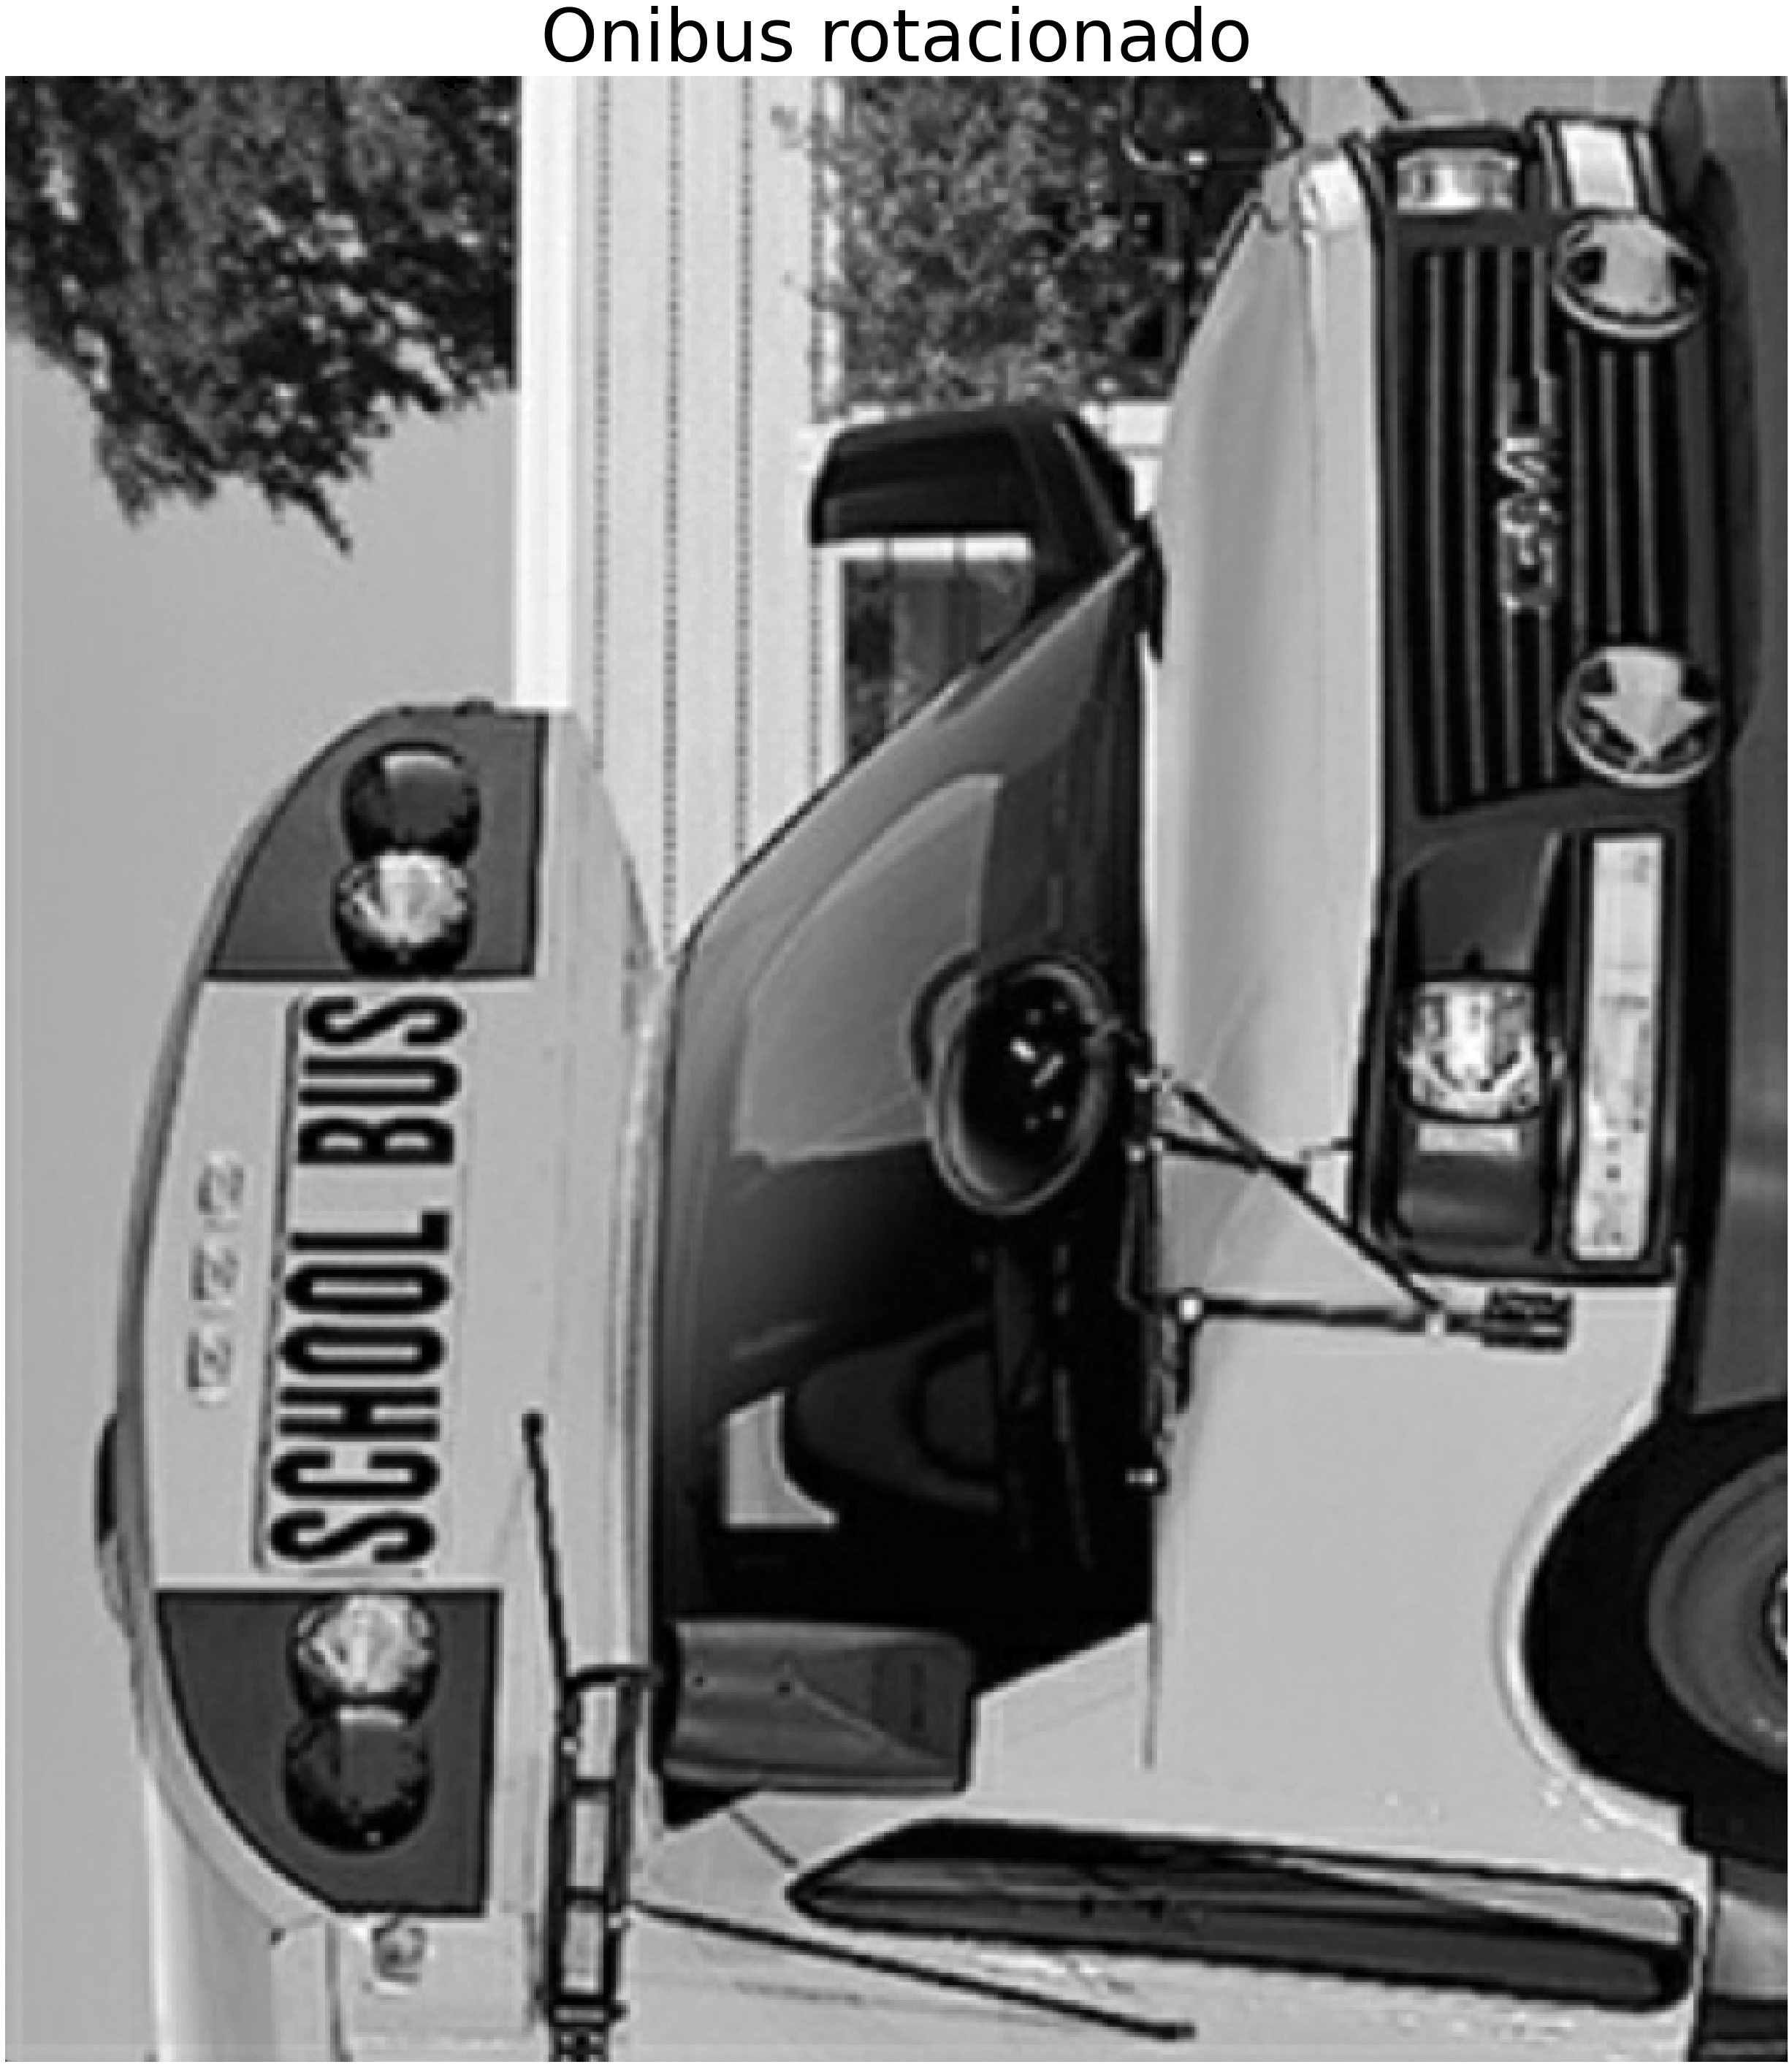

In [3]:
img1 = cv2.imread('imagens/bus-rotated.png', 0)  # query Image
show(img1, "Onibus rotacionado")

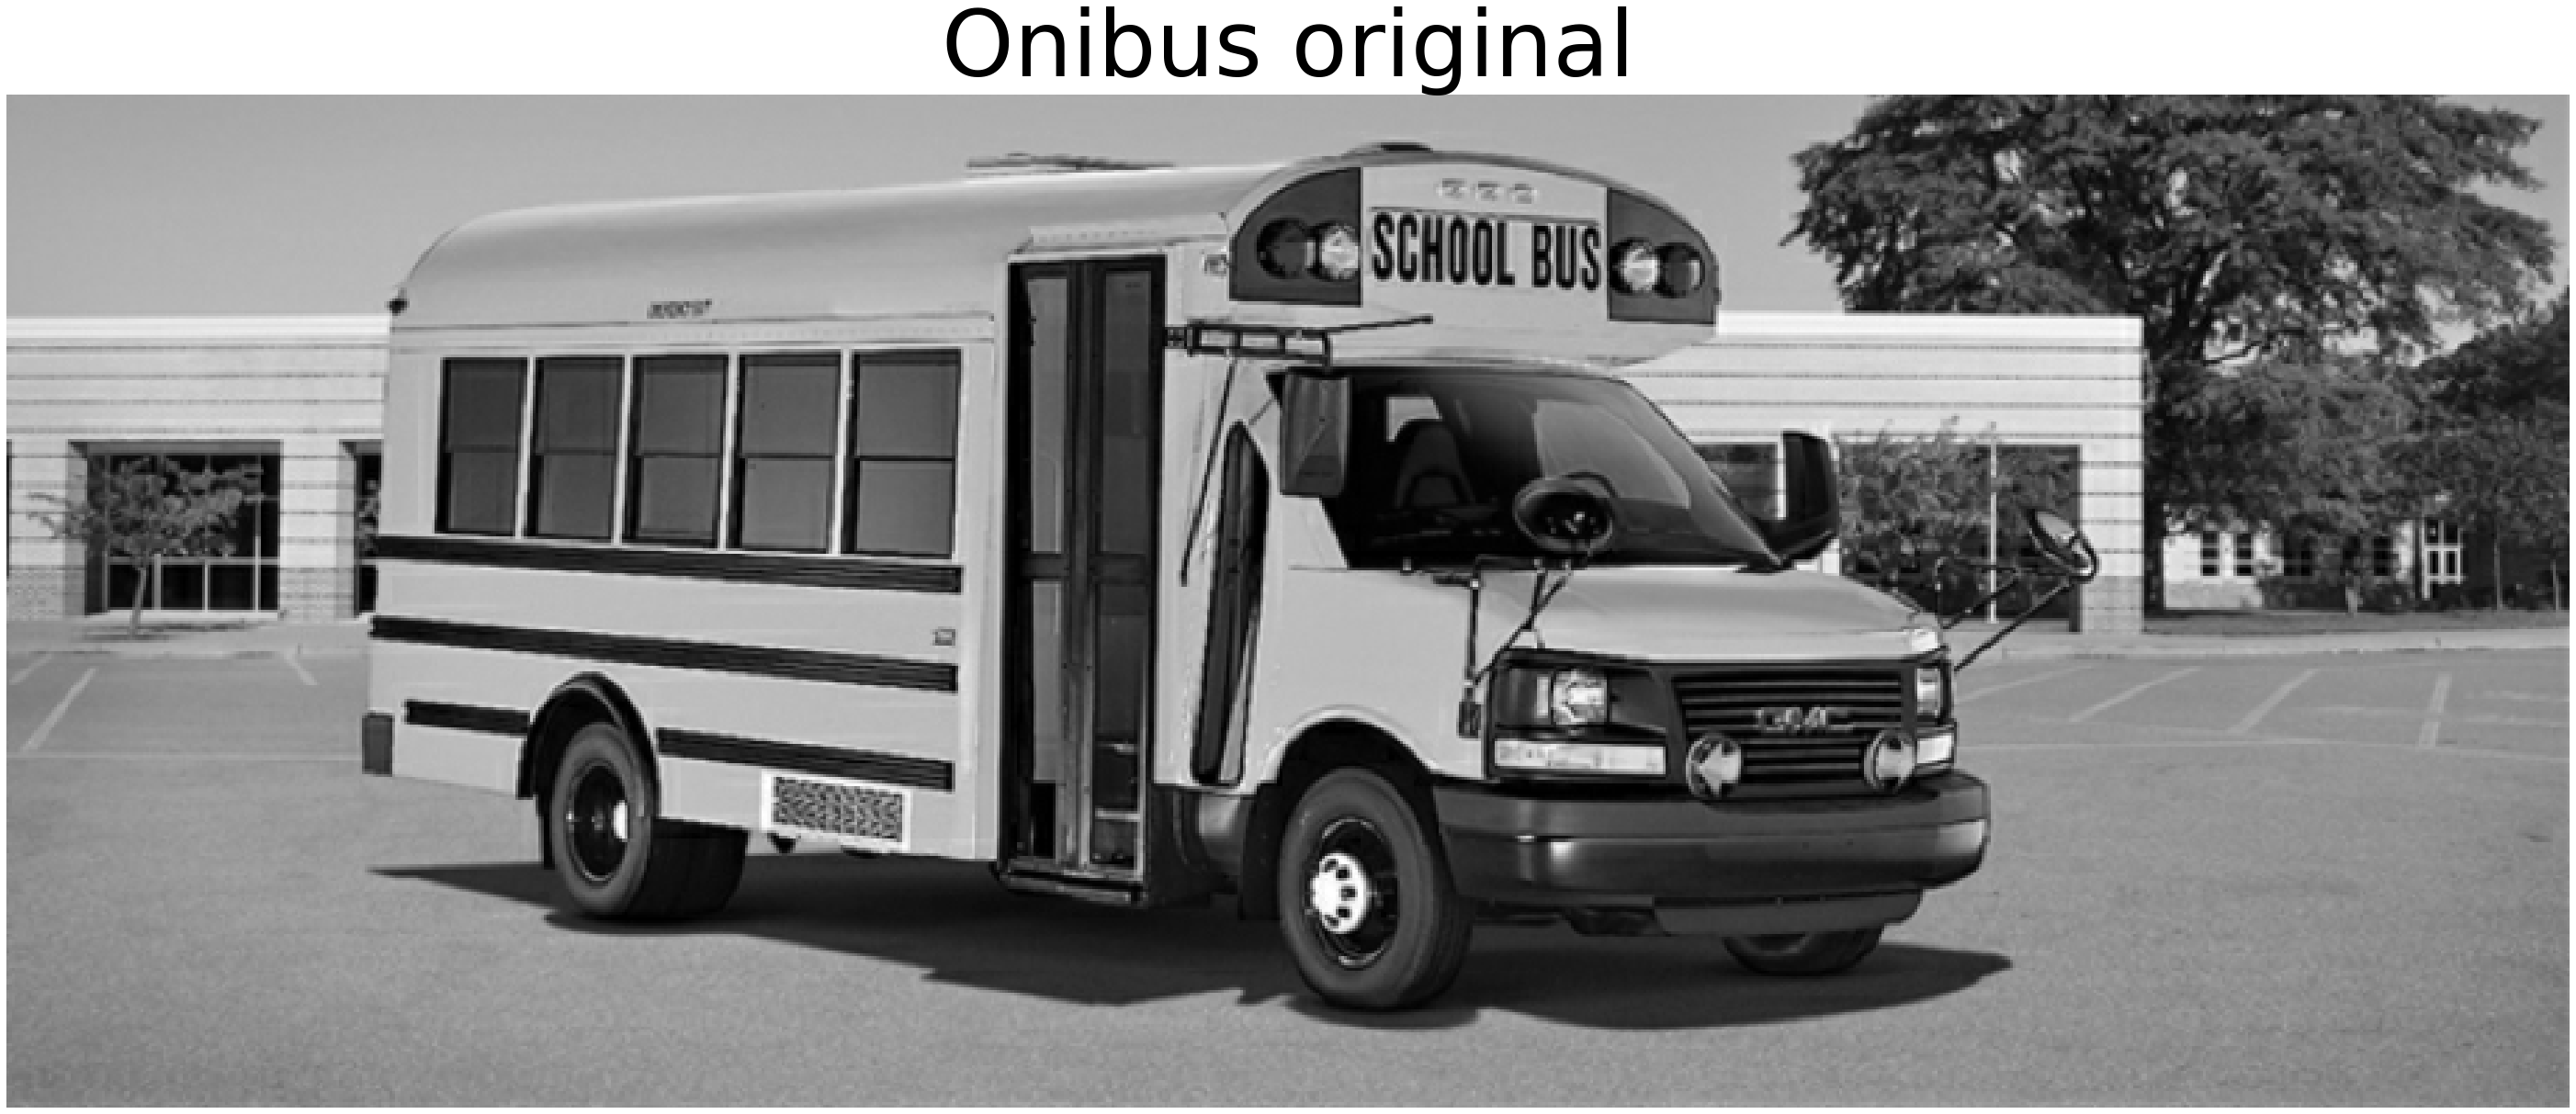

In [4]:
img2 = cv2.imread('imagens/bus.png', 0) # train Image
show(img2, "Onibus original")

In [5]:
# ORB Detector
orb = cv2.ORB_create()

In [6]:
# Extrai keypoints e descritores
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

In [7]:
# Cria o objeto para fazer o match (objeto para fazer a comparação entre os vetores de recursos)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [8]:
# Match descriptors (compara os descritores de ambas e gera suas combinações)
matches = bf.match(descriptors1, descriptors2)

In [9]:
# Classifica as combinações geradas na ordem de sua distância
matches = sorted(matches, key = lambda x:x.distance)

In [10]:
# Desenha as primeiras 'n' matches
img3 = draw_matches(img1, keypoints1, img2, keypoints2, matches[:30])

In [ ]:
show(img3, 'keypoints combinados')

Esse algoritmo vai olhar para os pontos de interesse que nós customizamos, esses pontos de interesses geram os descritores de recursos que então vão gerar o vetor de recursos (valores números que representam cada uma dessas áreas de interesse).
![img](https://user-images.githubusercontent.com/14116020/72210105-0eb90780-3495-11ea-8f29-78c56024994c.png)